In [13]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [16]:
import os
os.chdir("/gdrive/My Drive/Çalışma ortamı/")

In [17]:
!ls

'matris vektor.ipynb'   Rakam_Tanima.ipynb   Untitled6.ipynb
 RakamTanima_CNN.py     save_models	     VGG16_NesneTanima.ipynb


In [18]:
import numpy as np
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input,decode_predictions

In [19]:
model=VGG16(weights="imagenet",include_top=True)

In [20]:
layers=dict([(layer.name,layer.output) for layer in model.layers])
layers

{'input_2': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>,
 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 

In [21]:
model.count_params()

138357544

In [23]:
import os
os.chdir("/gdrive/My Drive/Çalışma ortamı/images")


In [24]:

!ls

 betty.jpg   f16.jpg  'inek (1).jpg'   inek.jpg   olips3.jpeg   olips.jpeg   van-kedisi.jpg


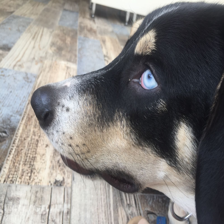

In [25]:
image_path="olips.jpeg"
image = Image.open(image_path)
image = image.resize((224, 224))
image


In [26]:

x = np.array(image, dtype = 'float32') #görüntüyü diziye çevirir
x = np.expand_dims(x, axis=0) #dizi listesine çevirir
x= preprocess_input(x)

In [27]:

preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

35363/35363 [==============================] - 0s 0us/step
predicted: [('n02088632', 'bluetick', 0.81589305), ('n02108000', 'EntleBucher', 0.06642745), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.06301928)]
bluetick
